In [1]:
# Import necessary libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function to read and process the data from the Excel file
def read_and_process_data(file_name):
    with warnings.catch_warnings(record=True):
        warnings.simplefilter("always")
        df = pd.read_excel(file_name, sheet_name="Current US$", skiprows=[0, 1, 2, 3, 4], engine="openpyxl")

    cols = df.columns
    df.rename(columns={cols[2]: "Expenditure_in_2020", cols[3]: "Expenditure_in_2021"}, inplace=True)

    return df

# Function to extract and process data for South American countries
def extract_south_america_data(df):
    df2 = df.iloc[74:84, 0:4].copy().reset_index(drop=True)
    df3 = df2.loc[:, ["Country", "Expenditure_in_2020", "Expenditure_in_2021"]]
    
    df3["Ranking"] = df3["Expenditure_in_2021"].rank(ascending=False)
    df4 = df3.sort_values("Ranking", ascending=True).reset_index(drop=True)
    df4['Expenditure_in_2020'] = df4['Expenditure_in_2020'].astype(float)
    df4['Expenditure_in_2021'] = df4['Expenditure_in_2021'].astype(float)

    return df4

# Function to save the resulting DataFrame to a CSV file
def save_to_csv(df, file_name):
    pd.options.display.float_format = '{:.1f}'.format
    df.to_csv(file_name, float_format='%.1f', index=False)

In [3]:
# Function to plot a bar chart for military expenditure by South American countries in 2021
def plot_bar_chart(df):
    plt.figure(figsize=(10, 6))
    plt.bar(df['Country'], df['Expenditure_in_2021'])
    plt.xlabel('Country')
    plt.ylabel('Military Expenditure (in million US$)')
    plt.title('Military Expenditure by South American Countries (2021)')
    plt.show()

# Function to create a grouped bar chart for military expenditure by South American countries in 2020 and 2021
def plot_grouped_bar_chart(df):
    df_grouped = df.loc[:, ["Country", "Expenditure_in_2020", "Expenditure_in_2021"]]
    df_melted = df_grouped.melt(id_vars=["Country"], var_name="Year", value_name="Expenditure")
    df_melted['Year'] = df_melted['Year'].apply(lambda x: x.split('_')[-1])

    plt.figure(figsize=(12, 6))
    sns.barplot(x="Country", y="Expenditure", hue="Year", data=df_melted)
    plt.xlabel('Country')
    plt.ylabel('Military Expenditure (in million US$)')
    plt.xticks(rotation=45)
    plt.title('Military Expenditure of South American Countries in 2020 and 2021')
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()

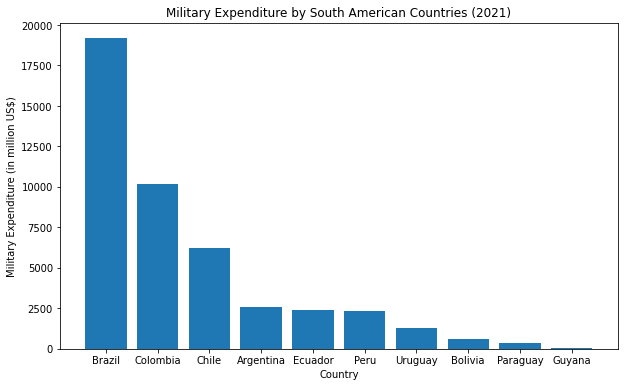

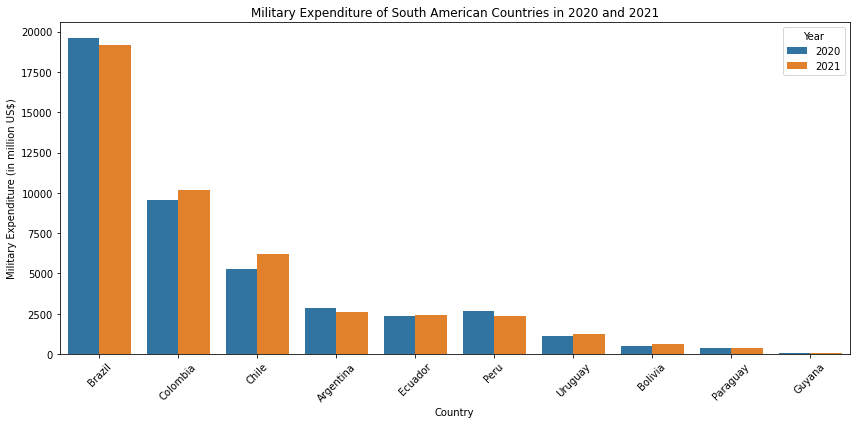

In [4]:
# Main function to execute the steps
input_file = 'SIPRI-Milex-data-2020-2022.xlsx'
output_file = 'Military_Expenditure_By_SA_Countries.csv'

# Read and process the data from the input file
df = read_and_process_data(input_file)

# Extract and process data for South American countries
df_south_america = extract_south_america_data(df)

# Save the resulting DataFrame to a CSV file
save_to_csv(df_south_america, output_file)

# Plot the bar chart
plot_bar_chart(df_south_america)

# Plot the grouped bar chart
plot_grouped_bar_chart(df_south_america)